Análise Regressão Linear 

Importando as bibliotecas necessárias

In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split

In [8]:
pwd

'C:\\Users\\Tiago'

Carregadon a base de dados

In [12]:
df = pd.read_csv('C:/Users/Tiago/AppData/Roaming/jupyter/runtime/train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Selecionando os atributos

In [15]:
df[['Outlet_Establishment_Year','Item_MRP','Item_Outlet_Sales']][:5]

,Outlet_Establishment_Year,Item_MRP,Item_Outlet_Sales
0,1999,249.8092,3735.1380
1,2009,48.2692,443.4228
2,1999,141.6180,2097.2700
3,1998,182.0950,732.3800
4,1987,53.8614,994.7052


In [17]:
X = df[['Outlet_Establishment_Year','Item_MRP']]

Separando os conjuntos de treino e teste

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X, df.Item_Outlet_Sales, test_size=0.3)

Verificando os shape dos dados

In [21]:
x_train.shape, y_train.shape

((5966, 2), (5966,))

In [23]:
x_test.shape, y_test.shape

((2557, 2), (2557,))

Instânciando a Regressão Linear

In [25]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

Treinando o modelo

In [27]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Predizendo os valores para o conjunto de teste

In [32]:
pred = lreg.predict(x_test)

Calculando o MSE (Mean Square Error)

In [35]:
mse = np.mean((pred - y_test)**2)
mse

2036847.016719487

Calculando os Coeficientes

In [37]:
coeff = DataFrame(x_train.columns)

coeff['Coeficientes'] = Series(lreg.coef_)

coeff

,0,Coeficientes
0,Outlet_Establishment_Year,-9.093289
1,Item_MRP,15.582665


Calculando o r-squared

In [39]:
lreg.score(x_test,y_test)

0.3106303640983963

Regressão Linear com mais variáveis

Verificando o atributo item Weight

In [41]:
df['Item_Weight'].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

Verificando e tratando registros nulos

In [43]:
df['Item_Weight'].isnull().sum()

1463

In [48]:
df['Item_Weight'].fillna((df['Item_Weight'].mean()), inplace=True)

Selecionando novamente os 3 atributos

In [50]:
X = df.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]

Separando os conjuntos de treino e teste

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, df.Item_Outlet_Sales, test_size=0.3)

Treinando novamente o modelo

In [54]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Executando a predição e calculando o MSE

In [56]:
pred = lreg.predict(x_test)

mse = np.mean((pred - y_test)**2)

mse

1992254.0827722743

Verificando os coeficientes

In [59]:
coeff = DataFrame(x_train.columns)

coeff['Coeficientes'] = Series(lreg.coef_)

coeff

,0,Coeficientes
0,Outlet_Establishment_Year,-12.269046
1,Item_MRP,15.437896
2,Item_Weight,-1.804857


Calculando o r-squared

In [62]:
lreg.score(x_test,y_test)

0.3224445930826877

Pre-processamento nos dados para aplicar a Regressão

Tratando Missing Values

In [64]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0,np.mean(df['Item_Visibility']))

df['Outlet_Establishment_Year'] = 2013 - df['Outlet_Establishment_Year']

df['Outlet_Size'].fillna('Small', inplace=True)

Convertendo atributos categóricos em numéricos

In [67]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [70]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [72]:
df.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

Importando o LabelEncoder

In [75]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [79]:
def generate_labelencoder(atts):
    for attr in atts:
        df[attr] = le.fit_transform(df[attr])
    return df   

In [81]:
df = generate_labelencoder(['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size'])

Verificando os dados após a transformação

In [83]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,9,14,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,3,4,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,9,14,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,2,0.066132,6,182.0950,0,15,2,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,1,0.066132,9,53.8614,1,26,0,Tier 3,Supermarket Type1,994.7052


Transformando dados categóricos que restaram

In [85]:
df = generate_labelencoder(['Outlet_Location_Type','Outlet_Type','Outlet_Identifier','Outlet_Size'])

Excluindo os atributos de identificador de item e quantidade de vendas

In [113]:
df = df.drop(['Item_Identifier','Outlet_Identifier'], axis=1)

In [115]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,14,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,4,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,14,1,0,1,2097.2700
3,19.20,2,0.066132,6,182.0950,15,2,2,0,732.3800
4,8.93,1,0.066132,9,53.8614,26,0,2,1,994.7052


Separando os conjuntos de dados em treino e teste

In [119]:
X = df[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [120]:
x_train, x_test, y_train, y_test = train_test_split( X, df.Item_Outlet_Sales, test_size=0.3)

Treinando o modelo com os atributos selecionados e transformados

In [121]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Realizando a predição e calculando as métricas

In [126]:
pred_cv = lreg.predict(x_test)

MSE

In [128]:
mse = np.mean((pred_cv - y_test)**2)
mse

1443971.486236108

R - Squared

Regularização

Verificando a magnitude dos coeficientes

<AxesSubplot:title={'center':'Modal Coefficients'}>

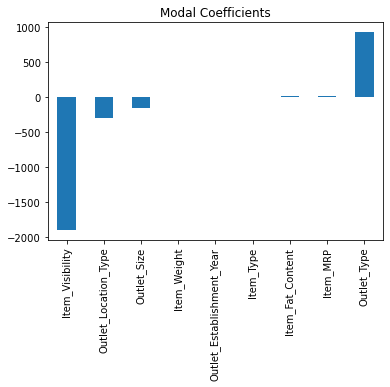

In [130]:
predictors = x_train.columns
coef = Series(lreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

Ridge Regression

In [132]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.05, normalize=True)

Treinando o Modelo

In [134]:
ridgeReg.fit(x_train,y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

Realizando a predição e calculando as métricas

In [136]:
pred = ridgeReg.predict(x_test)

mse = np.mean((pred - y_test)**2)

mse

1451927.2442532142

In [138]:
ridgeReg.score(x_test,y_test)

0.504025200953871

Verificando o impacto nos coeficientes de forma gráfica

In [140]:
def plot_coeficientes_ridge(alpha):
  ridgeReg = Ridge(alpha=alpha, normalize=True)
  
  ridgeReg.fit(x_train,y_train)
  
  predictors = x_train.columns
  
  coef = Series(ridgeReg.coef_,predictors).sort_values()
  
  print(coef)
  
  coef.plot(kind='bar', title='Ridge Coefficients')

alpha = 0.01

Item_Visibility             -1922.451160
Outlet_Location_Type         -290.338388
Outlet_Size                  -148.329636
Item_Weight                    -2.415396
Outlet_Establishment_Year      -1.730862
Item_Type                       1.082835
Item_Fat_Content               13.593237
Item_MRP                       15.321027
Outlet_Type                   914.719908
dtype: float64


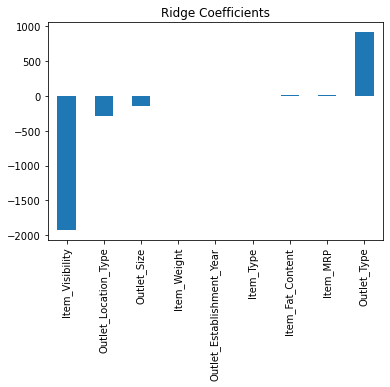

In [142]:
plot_coeficientes_ridge(0.01)

alpha = 0.5

Item_Visibility             -2020.212892
Outlet_Size                  -121.688417
Outlet_Location_Type          -81.875390
Item_Weight                    -0.698883
Outlet_Establishment_Year       1.242816
Item_Type                       2.453301
Item_Fat_Content                9.300096
Item_MRP                       10.313213
Outlet_Type                   551.631874
dtype: float64


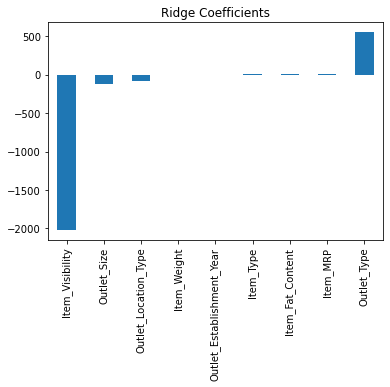

In [144]:
plot_coeficientes_ridge(0.5)

alpha = 10

Item_Visibility             -415.373992
Outlet_Size                  -32.805716
Item_Weight                    0.226659
Item_Fat_Content               0.591814
Item_Type                      0.790866
Outlet_Establishment_Year      0.876466
Item_MRP                       1.407266
Outlet_Location_Type          11.661650
Outlet_Type                   75.247813
dtype: float64


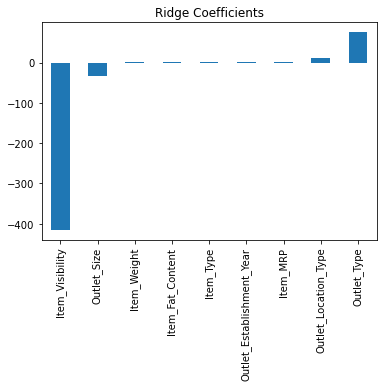

In [146]:
plot_coeficientes_ridge(10)

Pontos Importantes

O parametro alpha controla a penalização e consequentemente a magnitude dos coeficientes é reduzida.
Encolhendo os coeficientes temos uma redução na complexidade do modelo.

Lasso Regression

Importando e instanciando a classe Lasso

In [148]:
from sklearn.linear_model import Lasso


In [150]:
lassoReg = Lasso(alpha=0.05, normalize=True)

Treinando o modelo

In [152]:
lassoReg.fit(x_train,y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Realizando a predição e calculando as métricas

In [157]:
pred = lassoReg.predict(x_test)

In [158]:
mse = np.mean((pred - y_test)**2)
mse

1444071.0792304974

In [160]:
lassoReg.score(x_test,y_test)

0.5067088477301377

Verificação do impacto nos coeficientes de forma gráfica

In [163]:
def plot_coeficientes_lasso(alpha):
    lassoReg = Lasso(alpha = alpha, normalize=True)
    
    lassoReg.fit(x_train, y_train)
    
    predictors = x_train.columns
    
    coef = Series(lassoReg.coef_,predictors).sort_values()
    
    print(coef)
    
    coef.plot(kind='bar', title='Lasso Coefficients')

alpha = 0.01

Item_Visibility             -1893.242814
Outlet_Location_Type         -297.257837
Outlet_Size                  -147.019394
Item_Weight                    -2.282685
Outlet_Establishment_Year      -1.709945
Item_Type                       0.821576
Item_Fat_Content               12.287749
Item_MRP                       15.462702
Outlet_Type                   926.905225
dtype: float64


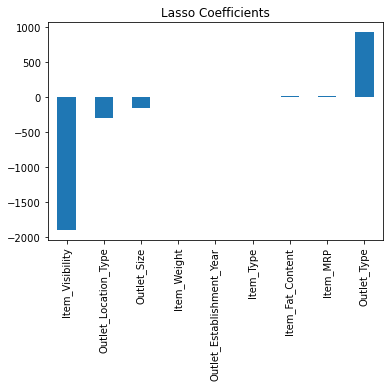

In [164]:
plot_coeficientes_lasso(0.01)

alpha = 0.5

Item_Visibility             -1387.604758
Outlet_Location_Type         -183.638940
Outlet_Size                   -51.441304
Item_Weight                    -0.000000
Item_Fat_Content                0.000000
Item_Type                       0.000000
Outlet_Establishment_Year       0.000000
Item_MRP                       14.870350
Outlet_Type                   860.224949
dtype: float64


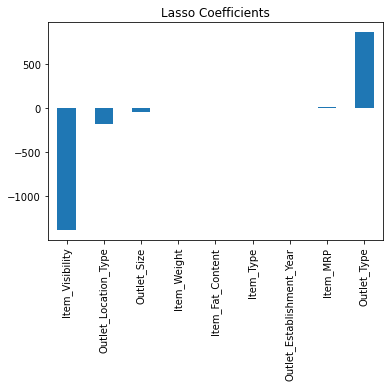

In [166]:
plot_coeficientes_lasso(0.5)

alpha = 1

Item_Visibility             -824.888426
Outlet_Location_Type         -81.420916
Item_Weight                   -0.000000
Item_Fat_Content               0.000000
Item_Type                      0.000000
Outlet_Establishment_Year      0.000000
Outlet_Size                   -0.000000
Item_MRP                      14.263479
Outlet_Type                  786.273427
dtype: float64


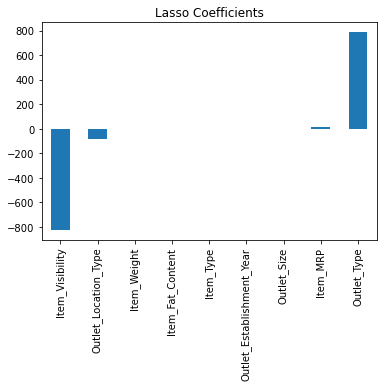

In [168]:
plot_coeficientes_lasso(1)

Pontos Importantes:
    
    Mesmo com pequenos valores de alpha a magnitude dos coeficientes diminui muito.
    O Lasso seleciona alguns atributos enquanto outros são reduzidos a zero(Feature Selection)

Elastic Net Regression

Importando os objetos da ElasticNet

In [170]:
from sklearn.linear_model import ElasticNet

Instanciando a classe e treinando o modelo

In [172]:
ENreg = ElasticNet(alpha = 1, l1_ratio=0.5, normalize=False)
ENreg.fit(x_train,y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Realizando as predições e calculando as métricas

In [174]:
pred = ENreg.predict(x_test)

In [180]:
mse = np.mean((pred - y_test)**2)

mse

1586949.02190427

In [182]:
ENreg.score(x_test,y_test)

0.4579020916159935

Pontos Importantes:
    A ElasticNet trabalha com uma combinaçaõ entre a Ridge e a Lasso.
    É interessante quando temos um grande dataset
    

In [184]:
def plot_coeficientes_elastic(alpha,l1):
    ENreg = ElasticNet(alpha=alpha, l1_ratio=l1, normalize=False)
    
    ENreg.fit(x_train,y_train)
    
    predictors = x_train.columns
    
    coef = Series(ENreg.coef_,predictors).sort_values()
    
    print(coef)
    
    coef.plot(kind = 'bar', title='Elastic Coefficients')
    

Outlet_Size                  -96.327733
Outlet_Location_Type         -40.465360
Item_Visibility              -13.648689
Item_Weight                   -2.138498
Item_Fat_Content               0.026191
Item_Type                      2.192137
Outlet_Establishment_Year      2.681198
Item_MRP                      15.491578
Outlet_Type                  467.173446
dtype: float64


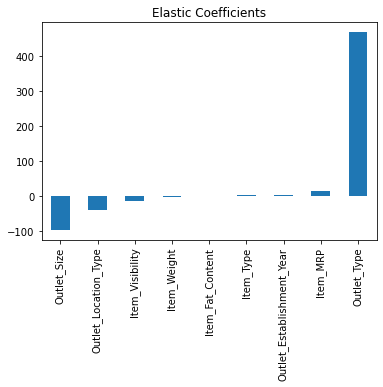

In [186]:
plot_coeficientes_elastic(1,0.5)

Item_Visibility             -1451.230489
Outlet_Location_Type         -298.732153
Outlet_Size                  -149.474168
Item_Weight                    -2.362543
Outlet_Establishment_Year      -2.100710
Item_Type                       1.088117
Item_Fat_Content                9.735889
Item_MRP                       15.478815
Outlet_Type                   931.127772
dtype: float64


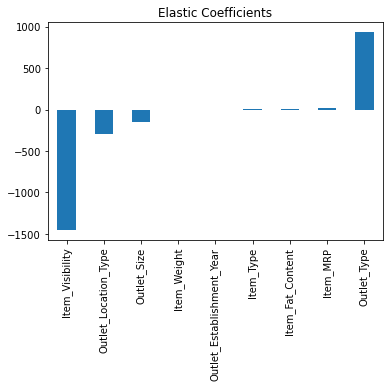

In [188]:
plot_coeficientes_elastic(1,1)

Verificando de forma grafica os resultados

In [195]:
import matplotlib.pyplot as plt
import pandas as pd

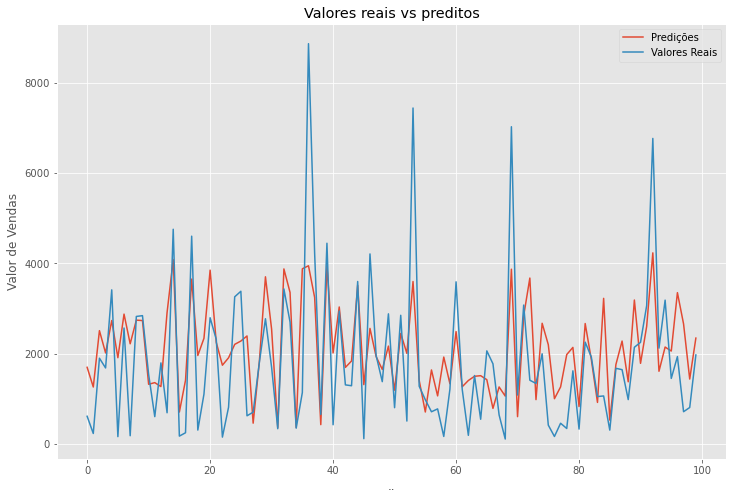

In [197]:
%matplotlib inline

predicoes = pd.DataFrame(pred[:100])

y_teste2 = pd.DataFrame(y_test.values[:100])

plt.style.use("ggplot")
plt.figure(figsize=(12,8))
plt.xlabel('..')
plt.ylabel('Valor de Vendas')
plt.title('Valores reais vs preditos')

plt.plot(y_teste2.index,predicoes)
plt.plot(y_teste2.index,y_teste2)

plt.legend(['Predições', 'Valores Reais'])

plt.show()
